<a href="https://colab.research.google.com/github/NneomaOkafor/HousingCAD/blob/main/EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load file and generate summaries

In [ ]:
import pandas as pd

# First Dataframe
df1 = pd.read_csv("/content/drive/MyDrive/Data Analysis/FINAL PROJECT/Python files/Average_home_prices.csv")
# Second data frame
df2 = pd.read_csv("/content/drive/MyDrive/Data Analysis/FINAL PROJECT/Python files/monthly_growth_rate_HPI (2).csv")
#Third data frame
df3= pd.read_csv ("/content/drive/MyDrive/Data Analysis/FINAL PROJECT/Python files/balanced_can_md.csv")
print("\nFirst DataFrame:")
print(df1)

print("\nSecond DataFrame:")
print(df2)

print("\nThird DataFrame:")
print(df3)
# Create a data profile summary table
def summarize(df):
    return pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "Unique Values": df.nunique().values,
    })

# Generate summaries
summary_df1 = summarize(df1)
summary_df2 = summarize(df2)
summary_df3 = summarize(df3)
# Add DataFrame name to each summary
summary_df1["/content/drive/MyDrive/Data Analysis/FINAL PROJECT/Python files/Average_home_prices.csv"] = "df1"
summary_df2["/content/drive/MyDrive/Data Analysis/FINAL PROJECT/Python files/monthly_growth_rate_HPI (2).csv"] = "df2"
summary_df3["/content/drive/MyDrive/Data Analysis/FINAL PROJECT/Python files/balanced_can_md.csv"] = "df3"

# Combine into one
combined_summary = pd.concat([summary_df1, summary_df2, summary_df3], ignore_index=True)

# Save combined summary
combined_summary.to_csv("combined_data_summary.csv", index=False)

print(combined_summary)


First DataFrame:
       Date   Average*
0    Jan-05   $231,609
1    Feb-05   $241,074
2    Mar-05   $246,071
3    Apr-05   $250,547
4    May-05   $253,006
..      ...        ...
239  Dec-24   $690,432
240  Jan-25   $669,345
241  Feb-25   $667,957
242  Mar-25   $678,217
243  Apr-25   $679,866

[244 rows x 2 columns]

Second DataFrame:
       Date Aggregate Composite MLS HPI
0    Jan-05                    $243,500
1    Feb-05                    $244,100
2    Mar-05                    $245,100
3    Apr-05                    $245,800
4    May-05                    $246,400
..      ...                         ...
239  Dec-24                    $712,400
240  Jan-25                    $710,700
241  Feb-25                    $704,400
242  Mar-25                    $697,600
243  Apr-25                    $689,200

[244 rows x 2 columns]

Third DataFrame:
           Date   GDP_new   BSI_new   GPI_new   SPI_new    IP_new   NDM_new  \
0    1981-01-01  0.001301  0.000791 -0.000379  0.002247 -0.002

Inspect date format

In [ ]:
print(df1['Date'].unique()[:10])
print(df2['Date'].unique()[:10])
print(df3['Date'].unique()[:10])

from pandas.tseries.offsets import MonthBegin

# Fix df1 and df2 dates (assume all years like '05' mean '2005')
df1['Date'] = pd.to_datetime(df1['Date'], format='%b-%y') + MonthBegin(0)
df2['Date'] = pd.to_datetime(df2['Date'], format='%b-%y') + MonthBegin(0)
df3['Date'] = pd.to_datetime(df3['Date'])

# Convert all date columns to datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df3['Date'] = pd.to_datetime(df3['Date'])

['Jan-05' 'Feb-05' 'Mar-05' 'Apr-05' 'May-05' 'Jun-05' 'Jul-05' 'Aug-05'
 'Sep-05' 'Oct-05']
['Jan-05' 'Feb-05' 'Mar-05' 'Apr-05' 'May-05' 'Jun-05' 'Jul-05' 'Aug-05'
 'Sep-05' 'Oct-05']
['1981-01-01' '1981-02-01' '1981-03-01' '1981-04-01' '1981-05-01'
 '1981-06-01' '1981-07-01' '1981-08-01' '1981-09-01' '1981-10-01']


Perform natural join with dates

In [ ]:
# Select needed columns from df1 and df2
df1_cols = [col for col in df1.columns if col.strip().startswith("Average")]
df1_subset = df1[['Date'] + df1_cols]
df2_subset = df2[['Date', 'Aggregate Composite MLS HPI']]

# Merge with df3
df3 = pd.merge(df3, df1_subset, on='Date', how='left')
df3 = pd.merge(df3, df2_subset, on='Date', how='left')

# Reorder columns: Date, df1 cols, df2 col, then remaining df3 original cols (excluding duplicates)
ordered_cols = (
    ['Date'] +
    df1_cols +
    ['Aggregate Composite MLS HPI'] +
    [col for col in df3.columns if col not in (['Date'] + df1_cols + ['Aggregate Composite MLS HPI'])]
)

df3 = df3[ordered_cols]

# Save to CSV
df3.to_csv("/content/drive/MyDrive/Data Analysis/FINAL PROJECT/Python files/merged_output_3.csv", index=False)



In [ ]:
import pandas as pd

# Load your data
df = pd.read_csv("/content/drive/MyDrive/Data Analysis/FINAL PROJECT/Python files/merged_output_3.csv")
# Display summary stats
print(df.describe(include='all'))

              Date   Average* Aggregate Composite MLS HPI     GDP_new  \
count          531        243                         243  531.000000   
unique         531        243                         238         NaN   
top     2025-03-01   $231,609                    $326,500         NaN   
freq             1          1                           2         NaN   
mean           NaN        NaN                         NaN    0.001875   
std            NaN        NaN                         NaN    0.007817   
min            NaN        NaN                         NaN   -0.109011   
25%            NaN        NaN                         NaN   -0.000131   
50%            NaN        NaN                         NaN    0.001996   
75%            NaN        NaN                         NaN    0.004349   
max            NaN        NaN                         NaN    0.055510   

           BSI_new     GPI_new     SPI_new      IP_new     NDM_new  \
count   531.000000  531.000000  531.000000  531.00000

Data summary of joined data

In [ ]:
import pandas as pd

#Fourth data frame
df4= pd.read_csv ("/content/drive/MyDrive/Data Analysis/FINAL PROJECT/Python files/merged_output_3.csv")

print("\nFourth DataFrame:")
print(df4)
# Create a data profile summary table
def summarize(df):
    return pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "Unique Values": df.nunique().values,
    })

# Generate summaries
summary_df4 = summarize(df4)

print(summary_df4)

# Save combined summary
summary_df4.to_csv("joined_data_summary.csv", index=False)


Fourth DataFrame:
           Date   Average* Aggregate Composite MLS HPI   GDP_new   BSI_new  \
0    1981-01-01        NaN                         NaN  0.001301  0.000791   
1    1981-02-01        NaN                         NaN  0.003043  0.003461   
2    1981-03-01        NaN                         NaN -0.000820 -0.000917   
3    1981-04-01        NaN                         NaN  0.011765  0.014779   
4    1981-05-01        NaN                         NaN -0.008364 -0.011973   
..          ...        ...                         ...       ...       ...   
526  2024-11-01   $697,565                    $713,200 -0.001984 -0.002234   
527  2024-12-01   $690,432                    $712,400  0.002730  0.003080   
528  2025-01-01   $669,345                    $710,700  0.004150  0.004452   
529  2025-02-01   $667,957                    $704,400 -0.001612 -0.002054   
530  2025-03-01   $678,217                    $697,600  0.001504  0.001571   

      GPI_new   SPI_new    IP_new   NDM_new 

In [ ]:
pip install pandas matplotlib seaborn


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis/FINAL PROJECT/Python files/Not in use/merged_output_3.csv')
df.rename(columns={'  Average*': 'Average_Price'}, inplace=True)
print(df.columns.tolist())  # Check that 'Average_Price' now appears

# Remove $, commas, and convert to float
df['Average_Price'] = df['Average_Price'].replace('[\$,]', '', regex=True).astype(float)
df['Aggregate Composite MLS HPI'] = df['Aggregate Composite MLS HPI'].replace('[\$,]', '', regex=True).astype(float)

# Optional: check conversion
print(df[['Average_Price', 'Aggregate Composite MLS HPI']].dtypes)
print(df[['Average_Price', 'Aggregate Composite MLS HPI']].head())

df.to_csv("Project_set_in_use.csv", index=False)

# Create a data profile summary table
def summarize(df):
    return pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "Unique Values": df.nunique().values,
    })
summary_df = summarize(df)
print(summary_df)

summary_df.to_csv("Project_set_in_use_summary.csv", index=False)

['Date', 'Average_Price', 'Aggregate Composite MLS HPI', 'GDP_new', 'BSI_new', 'GPI_new', 'SPI_new', 'IP_new', 'NDM_new', 'DM_new', 'OILP_new', 'CON_new', 'RT_new', 'WT_new', 'PA_new', 'FIN_new', 'OIL_CAN_new', 'EMP_CAN', 'EMP_SERV_CAN', 'EMP_FOR_OIL_CAN', 'EMP_CONS_CAN', 'EMP_SALES_CAN', 'EMP_FIN_CAN', 'EMP_MANU_CAN', 'EMP_PART_CAN', 'UNEMP_CAN', 'UNEMP_DURA_1.4_CAN', 'UNEMP_DURA_5.13_CAN', 'UNEMP_DURA_14.25_CAN', 'UNEMP_DURA_27._CAN', 'UNEMP_DURAvg_CAN_new', 'CLAIMS_CAN', 'TOT_HRS_CAN', 'GOOD_HRS_CAN', 'GOOD_OVT_HRS_CAN', 'NHOUSE_P_CAN', 'NHOUSE_P_NF', 'NHOUSE_P_PEI', 'NHOUSE_P_NS', 'NHOUSE_P_NB', 'NHOUSE_P_QC', 'NHOUSE_P_ONT', 'NHOUSE_P_MAN', 'NHOUSE_P_SAS', 'NHOUSE_P_ALB', 'NHOUSE_P_BC', 'hstart_CAN_new', 'hstart_NF_new', 'hstart_PEI_new', 'hstart_NS_new', 'hstart_NB_new', 'hstart_QC_new', 'hstart_ONT_new', 'hstart_MAN_new', 'hstart_SAS_new', 'hstart_ALB_new', 'hstart_BC_new', 'build_Total_CAN_new', 'build_Ind_CAN_new', 'build_Comm_CAN_new', 'build_Total_NF_new', 'build_Ind_NF_new'

Preview of the data:
         Date  Average_Price  Aggregate Composite MLS HPI   GDP_new   BSI_new  \
0  1981-01-01            NaN                          NaN  0.001301  0.000791   
1  1981-02-01            NaN                          NaN  0.003043  0.003461   
2  1981-03-01            NaN                          NaN -0.000820 -0.000917   
3  1981-04-01            NaN                          NaN  0.011765  0.014779   
4  1981-05-01            NaN                          NaN -0.008364 -0.011973   

    GPI_new   SPI_new    IP_new   NDM_new    DM_new  ...  CPI_MINUS_FOO_BC  \
0 -0.000379  0.002247 -0.002047 -0.003661 -0.000161  ...          0.023086   
1  0.004369  0.002204  0.004222  0.001718  0.012859  ...          0.010320   
2 -0.002830  0.000468  0.000000  0.011182 -0.002767  ...          0.026344   
3  0.017099  0.008327  0.018938  0.015594  0.013487  ...          0.005982   
4 -0.010776 -0.006796 -0.017627 -0.017293 -0.003982  ...          0.011858   

   CPI_MINUS_FEN_BC  CP

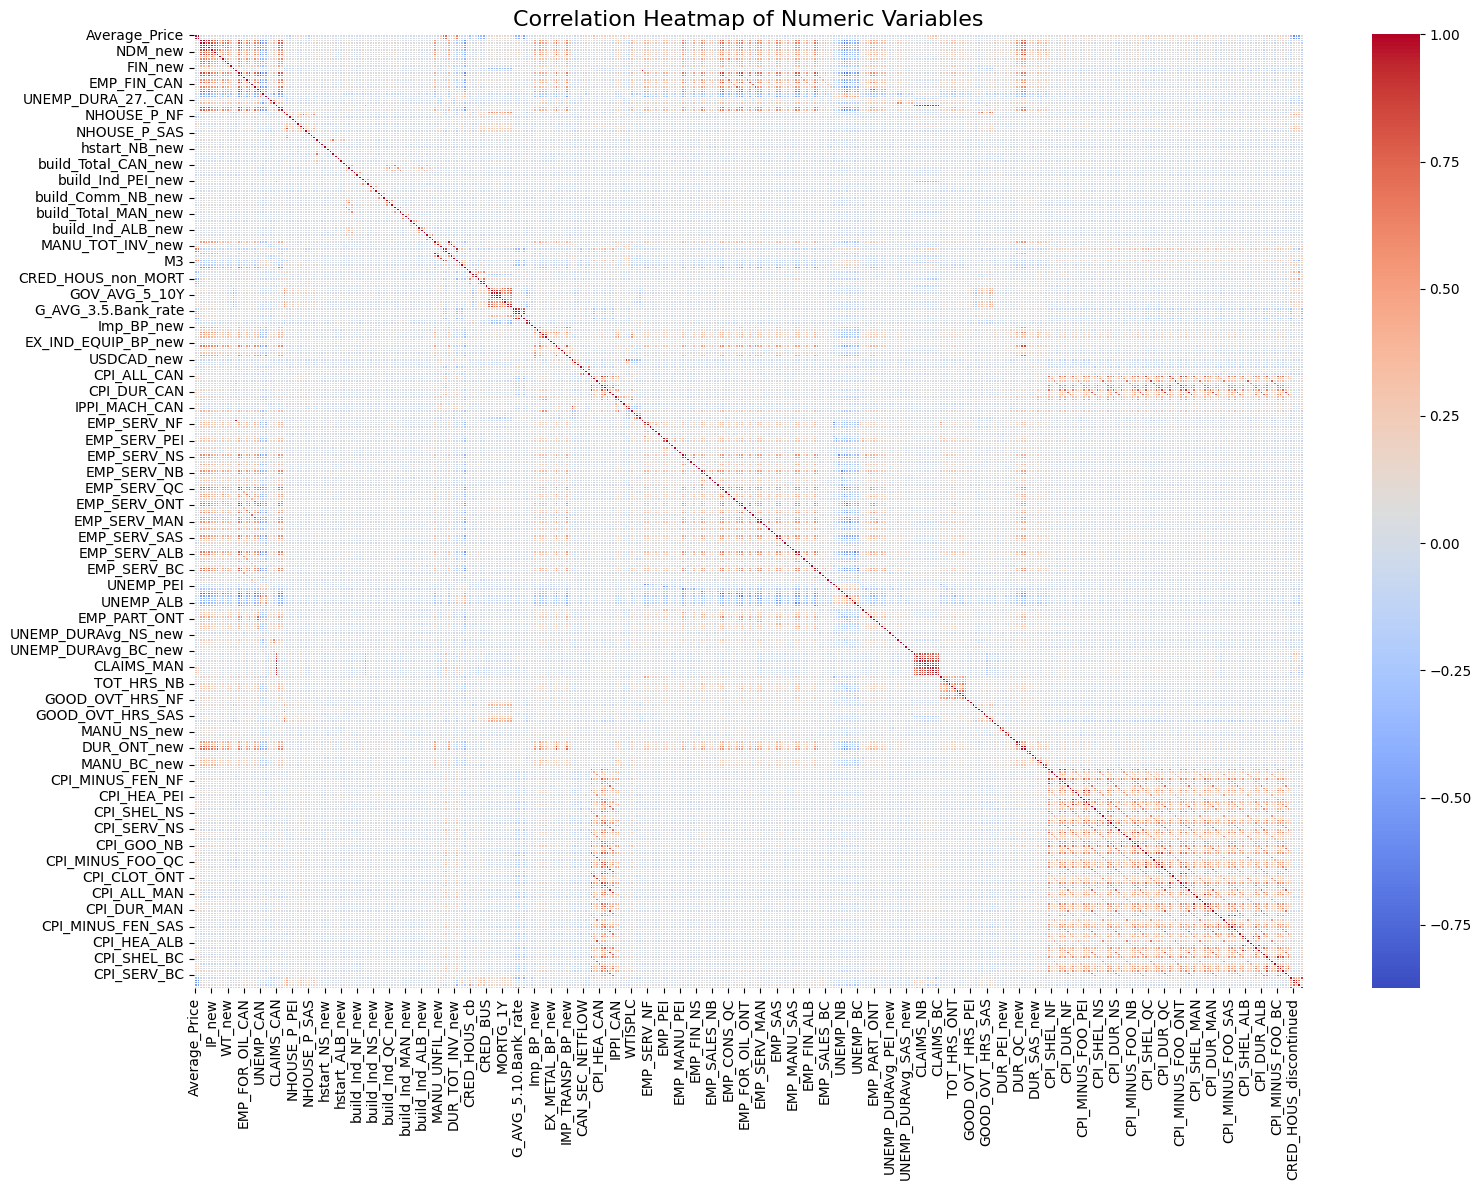

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Data Analysis/FINAL PROJECT/Python files/Project_set_in_use.csv')
# Display first 5 rows
print("Preview of the data:")
print(df.head())

# Compute descriptive statistics
desc_stats = df.describe(include='all')
print("\nDescriptive Statistics:")
print(desc_stats)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Correlation matrix (numeric features only)
print("\nCorrelation Matrix:")
print(df.corr(numeric_only=True))

# Optional: clean column names
df.columns = df.columns.str.strip()

# Keep only numeric columns
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Numeric Variables", fontsize=16)

# Display the heatmap
plt.tight_layout()
plt.show()